# Question 1-2, a first look at data

In [1]:
import json
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "../../projects/project_5/ECE219_tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", \
        "tweets_#nfl.txt", "tweets_#patriots.txt", \
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]
topics = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [3]:
def load_file(file):
    """
    Load the time(in human readable form), follows, and retweets
    """
    result = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for line in open(path + file, 'r') :
        a = json.loads(line)
        cita = a['citation_date']
        citetime = datetime.datetime.fromtimestamp(cita,pst_tz)
        foll = a['author']['followers']
        retweet = a['metrics']['citations']['total']
        result.append({'time': citetime, 'followers': foll, 'retweets': retweet})
    return result

In [4]:
def get_statistic(data_list):
    """
    Count average number of tweets per hour, the number of followers per tweet, 
    number of retweets per tweet, and hour-tweets history.
    The starting time is set to be Jan.14th 0:00
    """
    retweet = 0
    followers = 0
    tweets = len(data_list)
    hourlist = []
    for p in data_list:
        retweet += int(p['retweets'])
        followers += int(p['followers'])
        hourlist.append(((p["time"].month-1)*31+p["time"].day-14)*24+p["time"].hour)
    return [float(tweets) / max(hourlist), float(followers) / tweets , float(retweet) / tweets], hourlist

In [5]:
def plot_hist(time_list, title = ""):
    n, bins, patches = plt.hist(time_list, 50, alpha=0.5)
    plt.hist(time_list, bins, alpha=0.5, color="blue")
    plt.title(title)
    plt.show()

#### average tweet per hour, average followers per tweet, average retweet per tweet

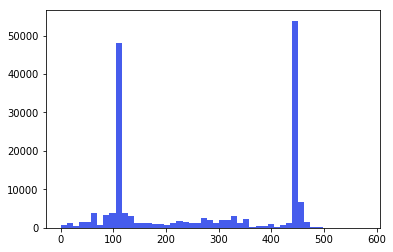

stat for topic gohawks:  [292.598615916955, 2217.9237355281984, 2.0132093991319877]


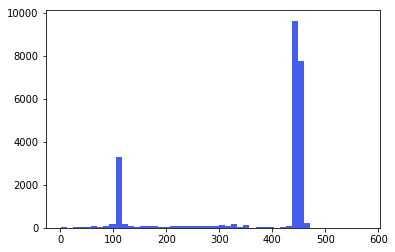

stat for topic gopatriots:  [40.888695652173915, 1427.2526051635405, 1.4081919101697078]


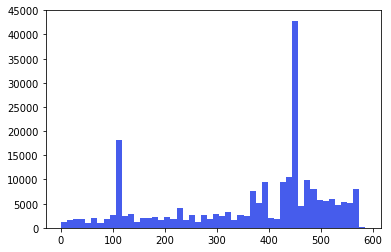

stat for topic nfl:  [397.64846416382255, 4662.37544523693, 1.5344602655543254]


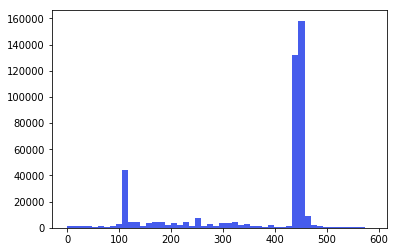

stat for topic patriots:  [751.9129692832764, 3280.4635616550277, 1.7852871288476946]


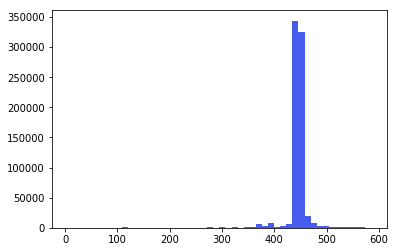

stat for topic sb49:  [1269.0255972696245, 10374.160292019487, 2.52713444111402]


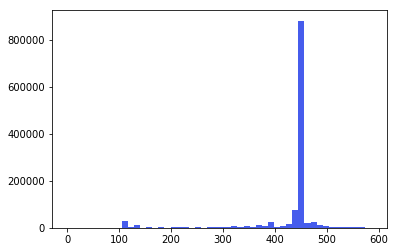

stat for topic superbowl:  [2071.353242320819, 8814.96799424623, 2.3911895819207736]


In [6]:
for i,file_i in enumerate(files):
    topic = load_file(file_i)
    stat, hourlist = get_statistic(topic)
    plot_hist(hourlist)
    print("stat for topic "+topics[i]+": ", stat)